# An analysis of key macroeconomic indicators for Kenya and Nepal

## Exploratory data analysis

In [ ]:
import numpy as np
import pandas as pd

# define the location of data
DATA_DIR = "../data/"

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
wdi_data = pd.read_csv(DATA_DIR + 'data.csv')

# remove metadata rows
wdi_data.drop(wdi_data.tail().index, inplace=True)

In [ ]:
wdi_data.tail(2)

,Country Name,Country Code,Series Name,Series Code,2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
2866,Nepal,NPL,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,29.3,29.4,29.4,29.3,29.2,29.2,29.3,29.8,30.6,31.7,33,34.5,36.1,37.6,38.7,39.4,39.9,40.1,40,..
2867,Nepal,NPL,Young people (ages 15-24) newly infected with HIV,SH.HIV.INCD.YG,1000,1000,1000,1000,1000,500,500,500,500,500,500,500,500,200,200,200,200,200,200,..


In [ ]:
employment_data = wdi_data[wdi_data['Series Name'].str.contains('employment')]
employment_data.head(2)

,Country Name,Country Code,Series Name,Series Code,2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
16,Kenya,KEN,Adequacy of unemployment benefits and ALMP (% ...,per_lm_alllm.adq_pop_tot,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
116,Kenya,KEN,Benefit incidence of unemployment benefits and...,per_lm_alllm.ben_q1_tot,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..


In [ ]:
employment_series_names = employment_data['Series Name'].unique().tolist()
employment_series_names[:3]

['Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households)',
 'Benefit incidence of unemployment benefits and ALMP to poorest quintile (% of total U/ALMP benefits)',
 'Child employment in agriculture (% of economically active children ages 7-14)']

### Cleaning the data

In [ ]:
employment_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 16 to 2851
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   174 non-null    object
 1   Country Code   174 non-null    object
 2   Series Name    174 non-null    object
 3   Series Code    174 non-null    object
 4   2001 [YR2001]  174 non-null    object
 5   2002 [YR2002]  174 non-null    object
 6   2003 [YR2003]  174 non-null    object
 7   2004 [YR2004]  174 non-null    object
 8   2005 [YR2005]  174 non-null    object
 9   2006 [YR2006]  174 non-null    object
 10  2007 [YR2007]  174 non-null    object
 11  2008 [YR2008]  174 non-null    object
 12  2009 [YR2009]  174 non-null    object
 13  2010 [YR2010]  174 non-null    object
 14  2011 [YR2011]  174 non-null    object
 15  2012 [YR2012]  174 non-null    object
 16  2013 [YR2013]  174 non-null    object
 17  2014 [YR2014]  174 non-null    object
 18  2015 [YR2015]  174 non-null 

In [ ]:
employment_data.replace('..', np.nan, inplace=True)

employment_data.isna().sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Country Name       0
Country Code       0
Series Name        0
Series Code        0
2001 [YR2001]    114
2002 [YR2002]    114
2003 [YR2003]    114
2004 [YR2004]    114
2005 [YR2005]    114
2006 [YR2006]     96
2007 [YR2007]    114
2008 [YR2008]     66
2009 [YR2009]    102
2010 [YR2010]    114
2011 [YR2011]    114
2012 [YR2012]    114
2013 [YR2013]    114
2014 [YR2014]    105
2015 [YR2015]    110
2016 [YR2016]     93
2017 [YR2017]     92
2018 [YR2018]    114
2019 [YR2019]    114
2020 [YR2020]    172
dtype: int64

In [ ]:
numeric_cols = employment_data.columns[4:]
employment_data[numeric_cols] = employment_data[numeric_cols].apply(pd.to_numeric, errors='coerce', axis=1)
employment_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 16 to 2851
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   174 non-null    object 
 1   Country Code   174 non-null    object 
 2   Series Name    174 non-null    object 
 3   Series Code    174 non-null    object 
 4   2001 [YR2001]  60 non-null     float64
 5   2002 [YR2002]  60 non-null     float64
 6   2003 [YR2003]  60 non-null     float64
 7   2004 [YR2004]  60 non-null     float64
 8   2005 [YR2005]  60 non-null     float64
 9   2006 [YR2006]  78 non-null     float64
 10  2007 [YR2007]  60 non-null     float64
 11  2008 [YR2008]  108 non-null    float64
 12  2009 [YR2009]  72 non-null     float64
 13  2010 [YR2010]  60 non-null     float64
 14  2011 [YR2011]  60 non-null     float64
 15  2012 [YR2012]  60 non-null     float64
 16  2013 [YR2013]  60 non-null     float64
 17  2014 [YR2014]  69 non-null     float64
 18  2015 [YR

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


There are so many missing values. But let's see what we can do with the data.

### Employment by sector

In [ ]:
sectors = ['agriculture', 'industry', 'services']
gender = ['male', 'female']

In [ ]:
def match_column_values(df, column, string, case=False):
  return df[df[column].str.contains(string, case=case)]

In [ ]:
employment_by_sector = match_column_values(employment_data, 'Series Name', ' | '.join(sectors))

# separate child employment
child_employment_idx = match_column_values(employment_by_sector, 'Series Name', 'child').index
child_employment_by_sector = employment_by_sector.loc[child_employment_idx]
employment_by_sector = employment_by_sector.drop(child_employment_idx)

In [ ]:
child_employment_by_sector.head(2)

,Country Name,Country Code,Series Name,Series Code,2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
147,Kenya,KEN,Child employment in agriculture (% of economic...,SL.AGR.0714.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,Kenya,KEN,Child employment in services (% of economicall...,SL.SRV.0714.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
employment_by_sector.head(2)

,Country Name,Country Code,Series Name,Series Code,2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
359,Kenya,KEN,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,51.50,54.279999,56.759998,58.93,61.060001,61.139999,60.970001,61.110001,60.939999,60.32,59.740002,59.220001,58.59,57.939999,57.259998,56.529999,55.860001,55.080002,54.34,NaN
362,Kenya,KEN,Employment in industry (% of total employment)...,SL.IND.EMPL.ZS,10.19,9.050000,8.090000,7.34,6.700000,6.460000,6.290000,6.130000,6.040000,6.01,6.010000,6.010000,6.03,6.060000,6.090000,6.130000,6.160000,6.190000,6.22,NaN


In [ ]:
employment_by_sector.isna().sum()

Country Name      0
Country Code      0
Series Name       0
Series Code       0
2001 [YR2001]     0
2002 [YR2002]     0
2003 [YR2003]     0
2004 [YR2004]     0
2005 [YR2005]     0
2006 [YR2006]     0
2007 [YR2007]     0
2008 [YR2008]     0
2009 [YR2009]     0
2010 [YR2010]     0
2011 [YR2011]     0
2012 [YR2012]     0
2013 [YR2013]     0
2014 [YR2014]     0
2015 [YR2015]     0
2016 [YR2016]     0
2017 [YR2017]     0
2018 [YR2018]     0
2019 [YR2019]     0
2020 [YR2020]    10
dtype: int64

In [ ]:
from matplotlib import pyplot as pyplot
import seaborn as sns

sns.set()

In [ ]:
agriculture = match_column_values(employment_by_sector, 'Series Name', 'agriculture')
industry = match_column_values(employment_by_sector, 'Series Name', 'industry')
services = match_column_values(employment_by_sector, 'Series Name', 'services')

# Insight on Employment Rate VS Year
The graphs below represents the comparison between Employment Rates VS Year for two countries: Kenya and Nepal. It illustrates how the employment data for these countries have changed over the year. The vertical axis shows the Industry Based Employment Rate. And the horizontal axis represents the total span of years from 2001 to 2019. There graph illustrates the comparison of two datasets: Kenya and Nepal. The blue dots depict the graph for Kenya, and the orange dots represent Nepal. 

Text(0, 0.5, 'Agriculture Based Employment Rate')

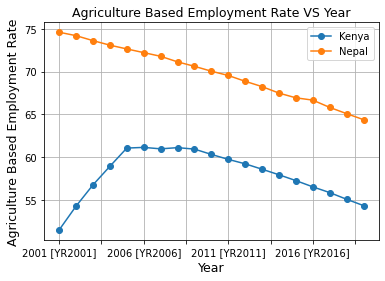

In [ ]:
agriculture = agriculture.T.reset_index().drop([0,1,2,3]).set_index('index').dropna()
agriculture.columns = ['Kenya', 'Nepal']
agriculture.plot(marker = 'o', grid = True)
pyplot.title('Agriculture Based Employment Rate VS Year', fontsize = 12.5)
pyplot.xlabel('Year', fontsize = 12.5)
pyplot.ylabel('Agriculture Based Employment Rate', fontsize = 12.5)

# Insight on Agriculture Based Employment Rate VS Year
It can be seen that over the span of 19 years, there's a *steady fall* in agricultural employment rate for Nepal. For instance, the rate decreased by **10.21** percentage points from *74.59* to *64.38* percent. Whereas, for Kenya, there's a *gradual increase* till the year 2005 - it had risen by **9.56** percentage points reaching *61.06* from an initial *51.50* percent. It fluctuated around the same range for a few years until 2010. Then, it started to *steadily decline* with an fall of **5.98** percentage points for the past 9 years reaching *54.34* from *60.32* percent. 

Text(0, 0.5, 'Industry Based Employment Rate')

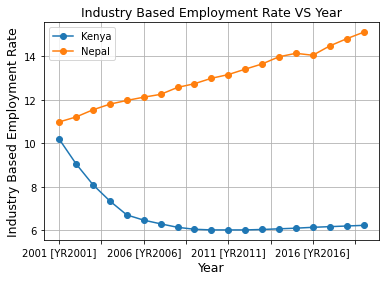

In [ ]:
industry = industry.T.reset_index().drop([0,1,2,3]).set_index('index').dropna()
industry.columns = ['Kenya', 'Nepal']
industry.plot(marker = 'o', grid = True)
pyplot.title('Industry Based Employment Rate VS Year', fontsize = 12.5)
pyplot.xlabel('Year', fontsize = 12.5)
pyplot.ylabel('Industry Based Employment Rate', fontsize = 12.5)

# Insight on Industry Based Employment Rate VS Year
If we look over time, we can see that there's a *steady increase* in industrial employment rate for Nepal. For instance, over 19 years, the rate increased by **4.13** percentage points from *10.98* to *15.11*. Whereas, for Kenya, there's a *gradual exponential decline* till the year 2012 - it has decreased by **4.18** percentage points reaching *6.01* from *10.09*. But after that it's slowly starting to climb with an increase of **0.21** percentage points for the past 8 years ending up at *6.22*. 


In [ ]:
# services = services.T.reset_index().drop([0,1,2,3]).set_index('index').dropna()
# services.columns = ['Kenya', 'Nepal']
# services.plot()

In [ ]:
services

,Country Name,Country Code,Series Name,Series Code,2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
365,Kenya,KEN,Employment in services (% of total employment)...,SL.SRV.EMPL.ZS,38.320000,36.669998,35.150002,33.730000,32.240002,32.400002,32.740002,32.770000,33.029999,33.680000,34.250000,34.770000,35.380001,36.000000,36.650002,37.330002,37.980000,38.730000,39.439999,NaN
366,Kenya,KEN,"Employment in services, female (% of female em...",SL.SRV.EMPL.FE.ZS,34.470001,33.130001,31.900000,30.740000,29.590000,29.590000,29.930000,30.280001,30.770000,31.490000,32.230000,32.970001,33.759998,34.580002,35.450001,36.320000,37.230000,38.139999,39.040001,NaN
367,Kenya,KEN,"Employment in services, male (% of male employ...",SL.SRV.EMPL.MA.ZS,41.980000,39.990002,38.139999,36.439999,34.590000,34.910000,35.270000,35.020000,35.080002,35.680000,36.110001,36.439999,36.889999,37.320000,37.779999,38.290001,38.700001,39.290001,39.820000,NaN
1799,Nepal,NPL,Employment in services (% of total employment)...,SL.SRV.EMPL.ZS,14.430000,14.600000,14.850000,15.120000,15.390000,15.670000,15.970000,16.309999,16.650000,16.969999,17.309999,17.730000,18.120001,18.549999,18.940001,19.290001,19.709999,20.110001,20.520000,NaN
1800,Nepal,NPL,"Employment in services, female (% of female em...",SL.SRV.EMPL.FE.ZS,10.150000,10.410000,10.670000,10.970000,11.250000,11.510000,11.800000,12.160000,12.600000,13.100000,13.610000,14.090000,14.570000,15.110000,15.590000,15.990000,16.450001,16.889999,17.299999,NaN
1801,Nepal,NPL,"Employment in services, male (% of male employ...",SL.SRV.EMPL.MA.ZS,18.490000,18.590000,18.820000,19.070000,19.340000,19.639999,19.940001,20.260000,20.559999,20.780001,21.100000,21.660000,22.150000,22.670000,23.120001,23.490000,23.870001,24.230000,24.580000,NaN


In [ ]:
# TODO: male, female and total employment graphs for Kenya and Nepal